Kinetics Toolkit (ktk) - Getting Started Tutorial
====================================


[Laboratory website](https://felixchenier.uqam.ca)

[Kinetics Toolkit (ktk) website](https://felixchenier.uqam.ca/kineticstoolkit)

[API documentation](https://felixchenier.uqam.ca/ktk_dist/api)

This is the getting started tutorial for the **unstable private version**. [Switch to the public version](https://felixchenier.uqam.ca/ktk_dist/tutorials).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Installing" data-toc-modified-id="Installing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installing</a></span></li><li><span><a href="#TimeSeries" data-toc-modified-id="TimeSeries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TimeSeries</a></span><ul class="toc-item"><li><span><a href="#Properties" data-toc-modified-id="Properties-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Properties</a></span><ul class="toc-item"><li><span><a href="#time" data-toc-modified-id="time-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>time</a></span></li><li><span><a href="#data" data-toc-modified-id="data-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>data</a></span><ul class="toc-item"><li><span><a href="#data-as-n-dimensional-arrays" data-toc-modified-id="data-as-n-dimensional-arrays-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>data as n-dimensional arrays</a></span></li></ul></li><li><span><a href="#time_info" data-toc-modified-id="time_info-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>time_info</a></span></li><li><span><a href="#data_info" data-toc-modified-id="data_info-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>data_info</a></span></li><li><span><a href="#events" data-toc-modified-id="events-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>events</a></span></li></ul></li><li><span><a href="#Using-events-to-synchronize-TimeSeries" data-toc-modified-id="Using-events-to-synchronize-TimeSeries-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using events to synchronize TimeSeries</a></span></li><li><span><a href="#Using-events-to-extract-sub-TimeSeries" data-toc-modified-id="Using-events-to-extract-sub-TimeSeries-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Using events to extract sub-TimeSeries</a></span></li><li><span><a href="#Subsetting-and-merging-timeseries" data-toc-modified-id="Subsetting-and-merging-timeseries-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Subsetting and merging timeseries</a></span></li></ul></li></ul></div>

Installing
----------

The public version of ktk is hosted on [PyPI](https://pypi.org/project/ktk/). As such, installing ktk is as simple as this:

    pip install ktk

Now we can import ktk and some other libraries used in this tutorial.

In [1]:
import ktk
import pandas as pd
import numpy as np

TimeSeries
-------------

This class is the basis of most ktk modules and is in my opinion very helpful in manipulating biomechanical data.

-------------------------

***The three roles of the TimeSeries class are to:***
1. *organize temporal data in time;*
2. *deal with events;*
3. *associate metadata to data.*

-------------------------

Although we often see the concept of time series in financial, forecast, and even psychological science, the concept of time series also applies very well to biomechanics: biomechanical data is almost always expressed as series of data in time (e.g., the trajectory of a marker, an electromyographic signal).

While in python, time series analyses are often performed using Pandas DataFrames, I believe DataFrames are suboptimal in biomechanics processing:

1. We often have to deal not just with series of data points, but also with **series of vectors** (e.g., trajectory of a marker) and **series of matrices** (e.g., series of transformation matrices). Expressing series of vectors and matrices in a bidimensional DataFrame is not convenient.

2. We often have different measures with **different units**, and there is no practical way with a DataFrame to associate units to columns, other than by keeping a separate dictionary.

3. We often deal with **events** (e.g., heel contact), and there is no practical way using a DataFrame to keep a list of those events with their corresponding times, other than by keeping a separate list.

To overcome these limitation, `ktk` provides the `TimeSeries` and `TimeSeriesEvent` classes, which are the basis of every `ktk` module. These classes are largely inspired by Matlab's `timeseries`, `tsdata.event` and `tscollection`. Note that TimeSeries are fully compatible with Pandas DataFrame using their conversion methods `from_dataframe` and `to_dataframe`.

To better understand the role and capabilities of the TimeSeries class, we will begin by opening some columns of a csv file as a Pandas DataFrame. This file contains forces and moments applied on an instrumented wheelchair wheel during the propulsion of a manual wheelchair.

In [2]:
# Read some columns
df = pd.read_csv('data/timeseries/smartwheel.csv',
                 usecols=[18, 19, 20, 21, 22, 23],
                 names=['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz'],
                 nrows=5000)

# Assign time to the DataFrame's index, where the sampling rate is 240 Hz.
df.index = np.arange(df.shape[0]) / 240
df

,Fx,Fy,Fz,Mx,My,Mz
0.000000,1.27,-0.89,-0.20,-0.03,0.05,-0.03
0.004167,0.49,-0.83,-0.51,0.02,-0.01,-0.13
0.008333,0.00,-0.78,-0.51,0.04,-0.07,-0.18
0.012500,-0.13,-0.93,-0.41,0.03,-0.16,-0.18
0.016667,-0.02,-0.89,0.00,0.01,-0.21,-0.13
...,...,...,...,...,...,...
20.812500,0.87,-1.73,0.00,0.08,-0.07,-0.03
20.816667,0.68,-2.38,0.20,0.07,-0.05,0.08
20.820833,0.39,-2.72,0.20,0.02,0.00,0.10
20.825000,0.32,-2.51,0.41,0.04,0.05,0.08


Now, we can convert this DataFrame to a TimeSeries:

In [3]:
ts = ktk.TimeSeries().from_dataframe(df)
ts

TimeSeries with attributes:
           data: <dict with 6 entries>,
      data_info: <dict with 0 entries>,
         events: <list of 0 items>
           time: <array of shape (5000,)>,
      time_info: <dict with 1 entries>,

### Properties ###

#### time ####

The `time` property is the time vector, which tells at which time correspond each of the samples.

In [4]:
ts.time

array([ 0.        ,  0.00416667,  0.00833333, ..., 20.82083333,
       20.825     , 20.82916667])

#### data ####

The `data` property contains the TimeSeries' data in a dictionary. Here, we had 6 columns in the DataFrame: each of these columns corresponds to a data key.

In [5]:
ts.data

{
    'Fx': <array of shape (5000,)>,
    'Fy': <array of shape (5000,)>,
    'Fz': <array of shape (5000,)>,
    'Mx': <array of shape (5000,)>,
    'My': <array of shape (5000,)>,
    'Mz': <array of shape (5000,)>
}

##### data as n-dimensional arrays #####

Up to now, there is no true benefit to using a TimeSeries instead of a DataFrame to process the forces and moments measured by the instrumented wheel. Let's see how the TimeSeries addresses point 1: **dealing with series of vectors and matrices**.

In reality, Fx, Fy and Fz are components of a single entity which is a force vector. Similarly, Mx, My and Mz are components of a single entity which is a moment vector. Let's see what happens if we name the DataFrames' columns differently.

In [6]:
df.columns = ['Forces[0]', 'Forces[1]', 'Forces[2]', 'Moments[0]', 'Moments[1]', 'Moments[2]']
df

,Forces[0],Forces[1],Forces[2],Moments[0],Moments[1],Moments[2]
0.000000,1.27,-0.89,-0.20,-0.03,0.05,-0.03
0.004167,0.49,-0.83,-0.51,0.02,-0.01,-0.13
0.008333,0.00,-0.78,-0.51,0.04,-0.07,-0.18
0.012500,-0.13,-0.93,-0.41,0.03,-0.16,-0.18
0.016667,-0.02,-0.89,0.00,0.01,-0.21,-0.13
...,...,...,...,...,...,...
20.812500,0.87,-1.73,0.00,0.08,-0.07,-0.03
20.816667,0.68,-2.38,0.20,0.07,-0.05,0.08
20.820833,0.39,-2.72,0.20,0.02,0.00,0.10
20.825000,0.32,-2.51,0.41,0.04,0.05,0.08


Now we convert this DataFrame to a TimeSeries:

In [7]:
ts = ktk.TimeSeries().from_dataframe(df)
ts.data

{
     'Forces': <array of shape (5000, 3)>,
    'Moments': <array of shape (5000, 3)>
}

We see that instead of being separated into 6 separate components, the three components of both the forces and moments are now grouped in two Nx3 arrays. This may greatly simplify subsequent data processing. For example, if we are interested in calculating the vectorial sum of the forces, then one could add this new data to the TimeSeries with this line:

In [8]:
ts.data['Ftot'] = np.sqrt(np.sum(ts.data['Forces']**2, axis=1))
ts.data

{
     'Forces': <array of shape (5000, 3)>,
       'Ftot': <array of shape (5000,)>
    'Moments': <array of shape (5000, 3)>,
}

#### time_info ####

The `time_info` property associates metadata to the time vector. It is a dictionary where each key is the name of one metadata. By default, `time_info` includes the `Unit` metadata, which corresponds to `s`. Any other metadata can be added by adding new keys in `time_info`.

In [9]:
ts.time_info

{
    'Unit': 's'
}

#### data_info ####

Similarly to `time_info`, the `data_info` property associates metadata to data. This is especially useful for addressing point 2: **dealing with several units**. This property is a dictionary of dictionaries, where the first key corresponds to the data key, and the second key is the metadata itself.

To ease the management of `data_info`, one can use the TimeSeries' `add_data_info` method.

In [10]:
ts.add_data_info('Forces', 'Unit', 'N')
ts.add_data_info('Moments', 'Unit', 'Nm')
ts.add_data_info('Ftot', 'Unit', 'N')
ts.data_info

{
     'Forces': <dict with 1 entries>,
       'Ftot': <dict with 1 entries>
    'Moments': <dict with 1 entries>,
}

In [11]:
ts.data_info['Forces']

{
    'Unit': 'N'
}

Now it is time to plot our TimeSeries, using its builtin `plot` method which makes use of `data_info` to write the data units in the legend.

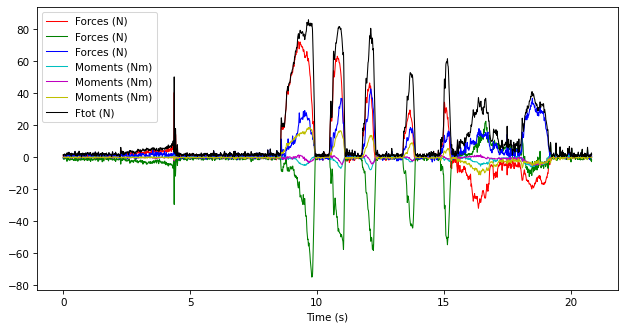

In [12]:
ts.plot()

#### events ####

Events are maybe the most interesting thing about the `TimeSeries` class. In the figure above, we clearly see that the TimeSeries consists in a series of events. A first event corresponds to a synchronization signal generated by creating an impact of the instrumented pushrim. Then, we have a series of pushes and recoveries. Although functions are implemented, for example in the `pushrimkinetics` or `cycle` submodules, to analyze signals and add events, we will start here by adding these events by hand.

In [13]:
ts.add_event(4.35, 'sync')
ts.add_event(8.56, 'push')
ts.add_event(9.93, 'recovery')
ts.add_event(10.50, 'push')
ts.add_event(11.12, 'recovery')
ts.add_event(11.78, 'push')
ts.add_event(12.33, 'recovery')
ts.add_event(13.39, 'push')
ts.add_event(13.88, 'recovery')
ts.add_event(14.86, 'push')
ts.add_event(15.30, 'recovery')

If we plot again the TimeSeries, we can see the added events.

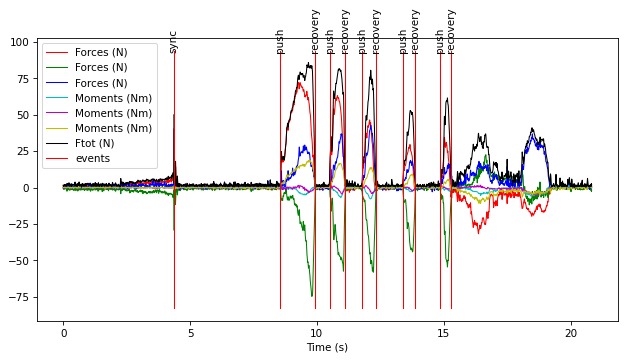

In [14]:
ts.plot(plot_event_names=True)

### Using events to synchronize TimeSeries ###

Let's see how we can make use of these events. First, the `sync` event can be used to set the zero-time, in the case where, for example, this wheel must be synchronized with another wheel, or with another instrument that also has a synchronization event. The method `sync_event` shifts the TimeSeries' time and events time so that the sync event becomes the new "zero-time".

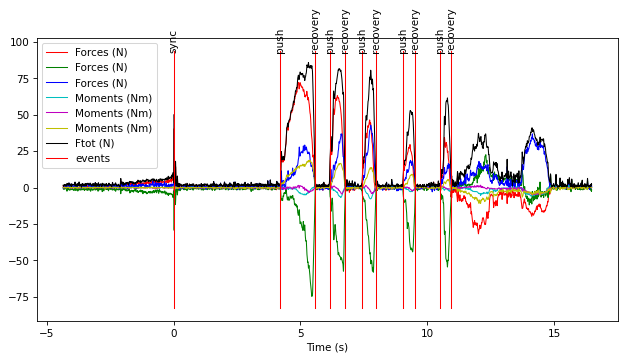

In [16]:
ts.sync_event('sync')
ts.plot(plot_event_names=True)

### Using events to extract sub-TimeSeries ###

The `TimeSeries` class comes with a myriad of methods such as `get_ts_after_event`, `get_ts_between_events`, etc. For example, if we want to analyze data of the four first pushes, and get rid of any other data, we could extract a new TimeSeries using:

4.2125
[[0.0, 'sync'], [4.210000000000001, 'push'], [5.58, 'recovery'], [6.15, 'push'], [6.77, 'recovery'], [7.43, 'push'], [7.98, 'recovery'], [9.040000000000001, 'push'], [9.530000000000001, 'recovery'], [10.51, 'push'], [10.950000000000001, 'recovery']]


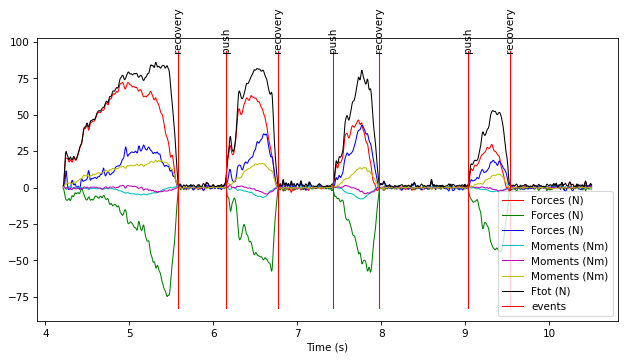

In [21]:
# Extract data push event 0 up to push event 4.
ts2 = ts.get_ts_between_events('push', 'push', 0, 4, inclusive=True)

print(ts2.time[0])
print(ts2.events)
# Remove the events that are not contained into the new time range.
ts2.trim_events()

ts2.plot(plot_event_names=True)

### Subsetting and merging timeseries ###

To be continued.